In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import dataToVar as dat

In [ ]:
# a = dat.h50
# b = dat.h70
# c = dat.h90
# d = dat.h100

# a = dat.h50_noInsert
# b = dat.h70_noInsert
# c = dat.h90_noInsert
# d = dat.h100_noInsert

a = dat.h50_insert
b = dat.h70_insert
c = dat.h90_insert
d = dat.h100_insert


# a = dat.h50_insertA
# b = dat.h70_insertA
# c = dat.h90_insertA
# d = dat.h100_insertA

shortest = min(len(a[1]),len(a[2]),len(b[1]),len(b[2]),len(c[1]),len(c[2]),len(d[1]),len(d[2]))
# shortest = len(c[2])

totalDat = [a,b,c,d]

samp = []
sampRaw = []
time = []
Ttherm = []
for i in totalDat:
    samp.append(-i[2][:shortest]+max(i[2]))
    sampRaw.append(i[2][:shortest])
    time.append(i[0][:shortest])
    Ttherm.append(np.array(i[1][:shortest]))


for i in Ttherm:
    for j in range(len(i)):
        if str(i[j]) == 'nan':
            i[j] = i[j-1]




3.571754171367189 4.962753922936386 6.964252507374624 7.912851456377851
0.0004947486312725369 0.013852650591628062 1.6253000693004136


''

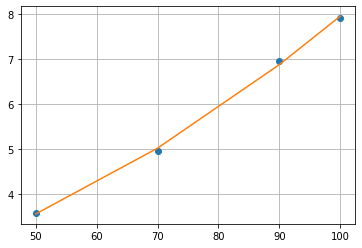

In [ ]:
offFif = 50 - np.average(a[2][-50:])

offSev = 70 - np.average(b[2][-50:])
offNin = 90 - np.average(c[2][-50:])
offOne = 100 - np.average(d[2][-50:])
print(offFif,offSev,offNin,offOne)
xx = np.array([50,70,90,100])
yy = np.array([offFif,offSev,offNin,offOne])

aa,bb,cc = np.polyfit(xx,yy,2)                              #offset coeffs
plt.plot(xx,yy,'o')
plt.plot(xx,aa*xx**2+bb*xx+cc)
plt.grid()
print(aa,bb,cc)


;

In [ ]:
def r2(y,fit):
    st = sum((y-np.average(y))**2)
    sr = sum((y-fit)**2)
    r2 = 1-sr/st
    return r2

# def decay(lam):
#     return (max(totalDat[i][2])-min(totalDat[i][2]))*np.exp(-lam*time[i])

def T(lam,Tset,time):
    offset = aa*Tset**2+bb*Tset+cc
    return (-Tset+offset+Tset[0])*np.exp(-lam*time)+Tset-offset
# def T(lam,Tset,time):
#     offset = aa*Tset**2+bb*Tset+cc
#     return (-Tset[-1]+offset+Tset[0])*np.exp(-lam*time)+Tset[-1]-offset

        



zlist = []
for i in sampRaw:
    for j in i:
        zlist.append(j)
zlist = np.array(zlist)
###############################################################################################################################################################################################




In [20]:
tries = np.arange(0,.1,.0001)

rr = {}
for i in tries:
    zlistFit = []
    for j in range(len(sampRaw)):
        zlistFit.append(T(i,Ttherm[j],time[j]))
  
    zlistFitShape = []
    for k in zlistFit:
        for l in k:
            zlistFitShape.append(l)
    zlistFitShape = np.array(zlistFitShape)
    

    r = r2(zlist,zlistFitShape)
    
    if r >= .7 and r <= 1:
        rr[r] = i
print(max(rr.keys()))
print(rr[max(rr.keys())])
    
    

0.9942767199436308
0.019200000000000002


''

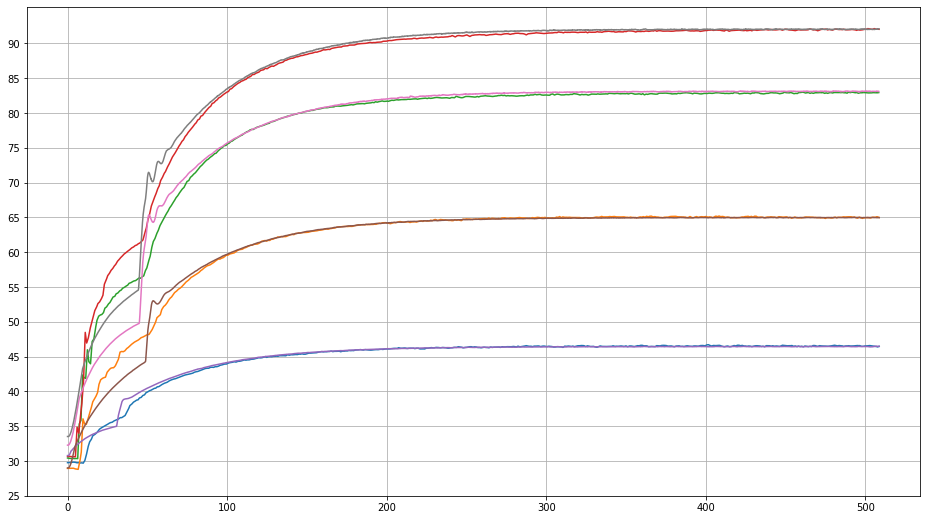

In [21]:
plt.figure(figsize=(16,9))
for i in range(len(sampRaw)):
    plt.plot(time[i],sampRaw[i])
for i in range(len(totalDat)):
    plt.plot(time[i],T(rr[max(rr.keys())],Ttherm[i],time[i]))
    # plt.plot(time[i],T(.025,Ttherm[i],time[i]))
plt.grid()
plt.yticks(np.arange(25,95,5))
# plt.xticks(np.arange(0,500,50))


;

NameError: name 'T2' is not defined

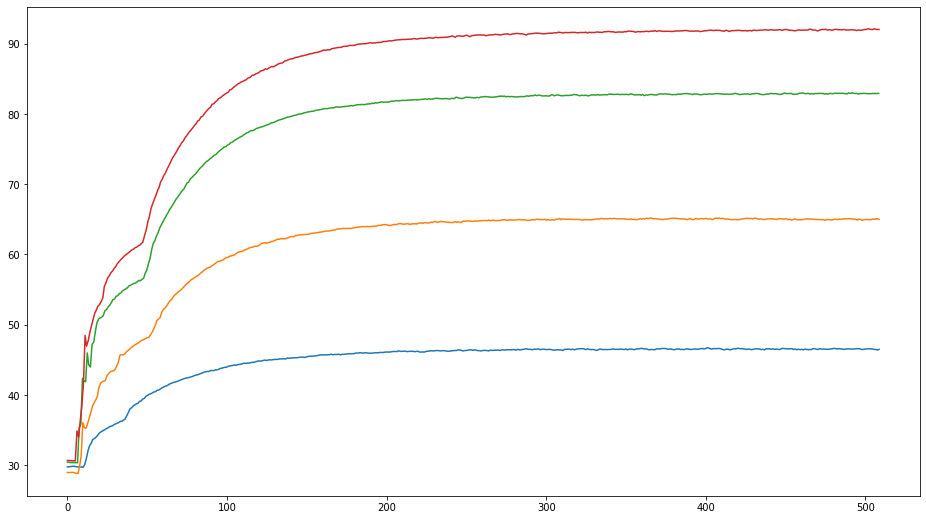

In [22]:


plt.figure(figsize=(16,9))
for i in range(len(sampRaw)):
    plt.plot(time[i],sampRaw[i])
for i in range(len(totalDat)):
    plt.plot(time[i],T2(rr[max(rr.keys())],Ttherm[i],time[i]))
    # plt.plot(time[i],T(.025,Ttherm[i],time[i]))
plt.grid()
plt.yticks(np.arange(25,95,5))
# plt.xticks(np.arange(0,500,50))
;

''

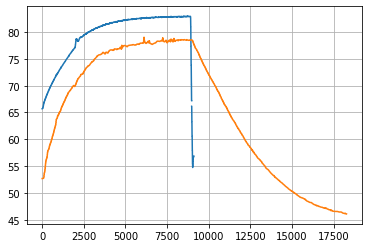

In [ ]:
fullSamp = np.array(dat.full_insertC[2])#[:17000]
fullTherm = np.array(dat.full_insertC[1])#[:1700])
fullTime = np.array(dat.full_insertC[0])

plt.plot(T(.018,fullTherm[8800:17900],fullTime[:9100]))

plt.plot(fullSamp[8800:])
# plt.plot(fullTherm)
plt.grid()
;

''

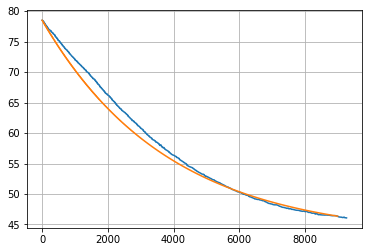

In [ ]:
fullSamp = np.array(dat.full_insertC[2])#[:17000]
fullTherm = np.array(dat.full_insertC[1])#[:1700])
fullTime = np.array(dat.full_insertC[0])

def cool(A0,lam,time,Alast):
    return (A0-Alast)*np.exp(-lam*time[:9000])+Alast
plt.plot(fullSamp[17800:])
plt.plot(cool(78.5,.0075,fullTime,43))

plt.grid()
;